In [1]:
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


np.random.seed(1220)

In [2]:
size = 10000
x = np.random.normal(size=size)
y = (x > 0).astype(np.float64)
x *= 1.5
x += 0.5 * np.random.normal(size=size)
x = x[:, np.newaxis]

In [3]:
model = linear_model.LinearRegression()
model.fit(x, y)

LinearRegression()

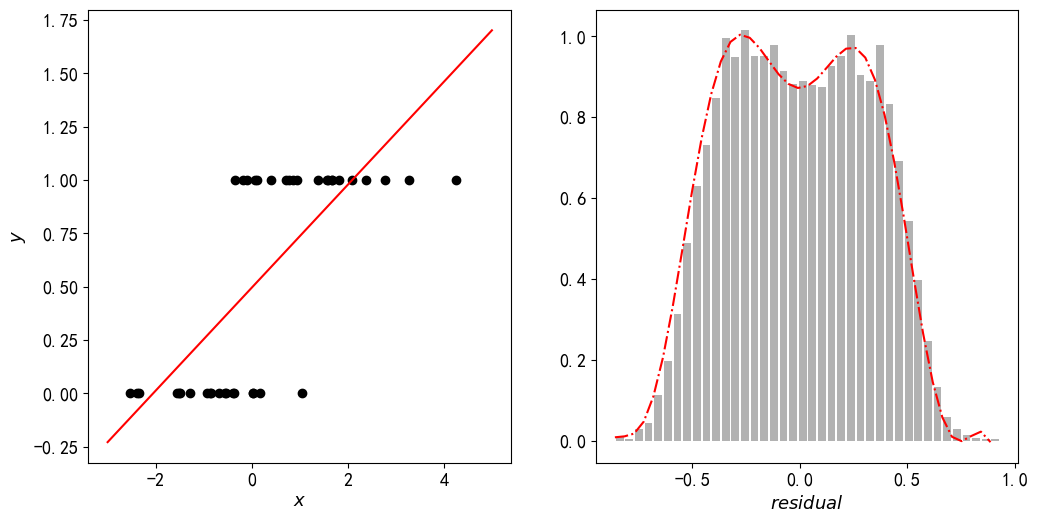

In [4]:
# 为在Matplotlib中显示中文，设置特殊字体
plt.rcParams['font.sans-serif'] = ['SimHei']
# 正确显示负号
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams.update({'font.size': 13})
# 创建一个图形框，在里面画两幅画
fig = plt.figure(figsize=(12, 6), dpi=100)
ax = fig.add_subplot(1, 2, 1)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
# 将原始数据表现在图上
ax.scatter(x[:40], y[:40], color='black')
# 画拟合的直线
xline = np.linspace(-3, 5, 100)[:, np.newaxis]
yline = model.predict(xline)
ax.plot(xline.ravel(), yline, 'r')

ax1 = fig.add_subplot(1, 2, 2)
residual = y - model.predict(x)
n, bins, _ = ax1.hist(residual, 40, density=1, facecolor='grey', rwidth=0.8, alpha=0.6)
# 用多项式拟合得到的直方图
z1 = np.polyfit(bins[:-1], n, 10)
p1 = np.poly1d(z1)
ax1.plot(bins[:-1], p1(bins[:-1]), 'r-.')
ax1.set_xlabel('$residual$')
plt.savefig('logit_example.png', dpi=200)
plt.show()